# 데이터 통합
### 서울 데이터가 6.14 누적 기준, 따라서 제주도 5,6월 데이터만 사용

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df5 = pd.read_csv("raw data/KRI-DAC_Jeju_data5.txt", sep=",", index_col=0)
print(df5.shape)
df6 = pd.read_csv("raw data/KRI-DAC_Jeju_data6.txt", sep=",", index_col=0)
print(df6.shape)

(273183, 13)
(281896, 13)


In [4]:
df_join = pd.concat([df5, df6])

In [5]:
df_join

,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y
OBJECTID,,,,,,,,,,,,,
1,1,202005,제주특별자치도,제주시,영세,일반한식,00시,363000,66500,10,2,877005.9834,1.479766e+06
2,2,202005,제주특별자치도,제주시,영세,단란주점,00시,1180000,0,3,0,877005.7447,1.479816e+06
3,3,202005,제주특별자치도,제주시,중소1,편의점,00시,157670,6850,20,2,877056.6756,1.479616e+06
4,4,202005,제주특별자치도,제주시,영세,편의점,00시,46600,0,2,0,877055.9593,1.479766e+06
5,5,202005,제주특별자치도,제주시,영세,주점,00시,66000,0,2,0,877055.4817,1.479866e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281892,281892,202006,제주특별자치도,제주시,영세,일반한식,x시,175000,0,2,0,950274.0385,1.500908e+06
281893,281893,202006,제주특별자치도,제주시,영세,일반한식,x시,600000,0,2,0,950266.5976,1.502458e+06
281894,281894,202006,제주특별자치도,제주시,영세,편의점,x시,6300,0,1,0,950266.5976,1.502458e+06


## Type 재설정

In [6]:
jeju_cat = df_join.copy()

In [9]:
jeju_cat.replace(dict.fromkeys(['택시', '기타교통수단', '통신기기'], '교통/통신'), inplace=True)
jeju_cat.replace(dict.fromkeys(['대형할인점'] , '마트(대형)'), inplace=True)
jeju_cat.replace(dict.fromkeys(['농축협직영매장', '농협하나로클럽', '인삼제품', '홍삼제품', '농축수산품', '기타건강식', '건강식품(회원제형태)'], '농협, 건강식'), inplace=True)
jeju_cat.replace(dict.fromkeys(['편의점', '슈퍼마켓', '정육점', '기타유통업', '연쇄점', '상품권', '주류판매점'], '편의점'), inplace=True)
jeju_cat.replace(dict.fromkeys(['악기점', 'DVD음반테이프판매', '문화취미기타', '영화관', '티켓', '수족관', '화랑'], '영화/문화'), inplace=True)
jeju_cat.replace(dict.fromkeys(['내의판매점', '양품점', '옷감직물', '귀금속', '기타직물', '스포츠의류', '가방', '정장', '악세사리', '기타잡화', '신발', '기타의류', '단체복', '아동의류', '캐쥬얼의류', '맞춤복점', '제화점', '인터넷Mall', '인터넷종합Mall'], '쇼핑/패션'), inplace=True)
jeju_cat.replace(dict.fromkeys(['제과점', '스넥', '기타음료식품'], '카페/베이커리'), inplace=True)
jeju_cat.replace(dict.fromkeys(['미용재료', '화장품', '피부미용실', '미용원', '이용원'], '뷰티'), inplace=True)
jeju_cat.replace(dict.fromkeys(['구내매점', '단란주점', '주점', '서양음식', '일반한식', '일식회집', '중국음식',  '유흥주점', '칵테일바'], '외식/주점'), inplace=True)
jeju_cat.replace(dict.fromkeys(['세탁소', '애완동물', '화원', '침구수예점', '성인용품점', '가전제품', '기타가구', '조명기구', '민예공예품', '주방용식기', '기타전기제품', '소프트웨어', '주방용구', '카페트커텐천막', '컴퓨터', '카메라', '일반가구', '정수기', '철제가구', '시계', '안경', '사우나', '안마스포츠마사지', '사진관', '인테리어', 'CATV'], '생활/기타'), inplace=True)
jeju_cat.replace(dict.fromkeys(['완구점', '화방표구점', '문구용품', '일반서적', '출판인쇄물', '기타사무용', '사무기기', '전문서적', '정기간행물', '기타서적문구', '서적출판(회원제형태)'], '서점/문구'), inplace=True)
jeju_cat.replace(dict.fromkeys(['기타보험', '손해보험'], '금융'), inplace=True)
jeju_cat.replace(dict.fromkeys(['기념품점', '기타숙박업', '특급호텔', '2급호텔', '1급호텔', '콘도', '렌트카', '관광여행', '항공사', '여객선', '면세점'], '여행/숙박'), inplace=True)
jeju_cat.replace(dict.fromkeys(['레져용품수리', '스포츠레져용품', '골프용품', '노래방', '당구장', '골프경기장', '볼링장', '골프연습장', '헬스크럽', '레져업소(회원제형태)', '기타레져업', '종합레져타운', '수영장', '테니스장', '기타회원제형태업소', ], '레저/스포츠'), inplace=True)
jeju_cat.replace(dict.fromkeys(['유아원', '독서실', '보습학원', '기능학원', '기타교육', '외국어학원', '학원(회원제형태)', '예체능학원', '컴퓨터학원', '대학등록금', '학습지교육', '초중고교육기관'], '교육/육아'), inplace=True)
jeju_cat.replace(dict.fromkeys(['주유소', '자동차정비', 'LPG', '세차장', '유류판매', '이륜차판매', '윤활유전문판매', '자동차시트타이어', '중고자동차', '수입자동차', '자동차부품', '주차장', '기타자동차서비스', '카인테리어', ], '주유/자동차'), inplace=True)
jeju_cat.replace(dict.fromkeys(['약국', '종합병원', '기타의료기관및기기', '한약방', '제약회사', '의료용품', '건강진단', '한의원', '동물병원', '의원', '치과의원', '병원', '산후조리원', '치과병원'], '의료'), inplace=True)
jeju_cat.replace(dict.fromkeys(['목재석재철물', '건축요업품', '골동품점', '기계공구', '기타건축자재', '보일러펌프', '페인트', '냉열기기', '유리', '과학기자재', '기타광학품', '기타연료', '중장비수리', ], '건설/제조'), inplace=True)
jeju_cat.replace(dict.fromkeys(['기타농업관련', '비료농약사료종자', '농기계', '미곡상'], '농업'), inplace=True)
jeju_cat.replace(dict.fromkeys(['사무서비스', '기타대인서비스', '화물운송', '보관창고업', '종합용역', '조세서비스', '가례서비스', '공공요금', '위탁급식업', '기타용역서비스', '기타수리서비스', '기타운송', '가정용품수리', '견인서비스', '부동산중개임대', '부동산분양', '신변잡화수리', '사무통신기기수리', '법률회계서비스', '사무서비스(회원제형태)', '정보서비스', '기타업종', '기타비영리유통'], '서비스/기타'), inplace=True)


In [11]:
jeju_cat.head()

,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y
OBJECTID,,,,,,,,,,,,,
1,1,202005,제주특별자치도,제주시,영세,외식/주점,00시,363000,66500,10,2,877005.9834,1.479766e+06
2,2,202005,제주특별자치도,제주시,영세,외식/주점,00시,1180000,0,3,0,877005.7447,1.479816e+06
3,3,202005,제주특별자치도,제주시,중소1,편의점,00시,157670,6850,20,2,877056.6756,1.479616e+06
4,4,202005,제주특별자치도,제주시,영세,편의점,00시,46600,0,2,0,877055.9593,1.479766e+06
5,5,202005,제주특별자치도,제주시,영세,외식/주점,00시,66000,0,2,0,877055.4817,1.479866e+06


## 업종별 재난지원금 사용 비율

In [19]:
jaenan = jeju_cat.groupby("Type").sum()["DisSpent"]

In [20]:
jeju_cat['Total_DisSpent'] = sum(jaenan)

In [21]:
jeju_cat['DisSpent_rate'] = jeju_cat['DisSpent']/jeju_cat['Total_DisSpent']

In [26]:
jaenan_rate = jeju_cat[['Type','DisSpent','DisSpent_rate','Total_DisSpent']]

In [27]:
jaenan_rate = jaenan_rate.groupby("Type").sum()

In [17]:
#jaenan_rate['DisSpent_rate'] = jaenan_rate['DisSpent']/jaenan_rate['Total_DisSpent']

In [28]:
jaenan_rate['DisSpent_rate'].sum()

0.9999999999999946

In [29]:
jaenan_rate = jaenan_rate.sort_values("DisSpent_rate", ascending = False)

In [31]:
jaenan_rate

,DisSpent,DisSpent_rate,Total_DisSpent
Type,,,
외식/주점,7652174351,0.226085,7182756885203968
편의점,7451649359,0.220160,2528667804942080
"농협, 건강식",4445380365,0.131340,610352918304384
주유/자동차,2806969640,0.082932,711384552593664
의료,2636036081,0.077882,853031919260544
쇼핑/패션,1571828584,0.046440,667384175851264
레저/스포츠,1571509112,0.046431,983543805967232
생활/기타,1273991871,0.037640,833807139268480
카페/베이커리,1200247730,0.035462,1285657161969280


In [41]:
jaenan_mart = jaenan_rate.loc[["농협, 건강식", "마트(대형)"]]
jaenan_mart['Total_DisSpent'] = sum(jaenan_mart['DisSpent'])
jaenan_mart['DisSpent_rate'] = jaenan_mart['DisSpent']/jaenan_mart['Total_DisSpent']
jaenan_mart

,DisSpent,DisSpent_rate,Total_DisSpent
Type,,,
"농협, 건강식",4445380365,0.937268,4742910383
마트(대형),297530018,0.062732,4742910383


Text(0.5, 1.0, '제주도 재난지원금 사용 비율 - 마트')

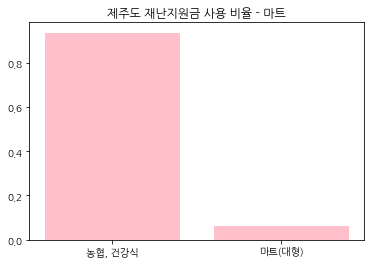

In [51]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', family='NanumGothic') #한글 깨짐 방지
plt.bar(list(jaenan_mart.index), jaenan_mart['DisSpent_rate'], color = 'pink')
plt.title('제주도 재난지원금 사용 비율 - 마트')

In [58]:
jaenan_rate.loc['마트'] = jaenan_rate.loc['농협, 건강식'] + jaenan_rate.loc['마트(대형)']

In [64]:
jaenan_rate = jaenan_rate.drop('마트(대형)')
jaenan_rate = jaenan_rate.drop('농협, 건강식')

In [70]:
jaenan_rate = jaenan_rate.sort_values('DisSpent_rate', ascending = False)

Text(0.5, 1.0, '5,6월 제주도 재난지원금 사용처')

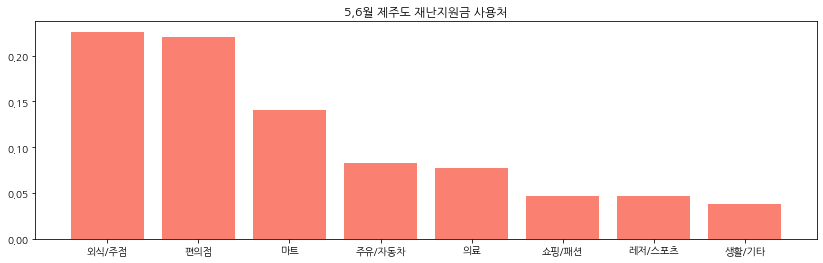

In [73]:
plt.rc('font', family='NanumGothic') #한글 깨짐 방지
plt.rcParams["figure.figsize"] = (14,4)
plt.bar(list(jaenan_rate.index)[0:8], jaenan_rate["DisSpent_rate"][0:8], color = 'salmon')
plt.title('5,6월 제주도 재난지원금 사용처')

In [ ]:
# Visualization

import seaborn as sns
import matplotlib.pyplot as plt
#그래프 전체 배경 사이즈 설정
sns.set(rc={'figure.figsize':(15, 6)})

#피봇테이블 정의
pivot_table_jaenan = pd.pivot_table(jaenan_rate, index = "Type", columns = )
pivot_table_quantity = pd.pivot_table(df, index = "payment_month", columns = "item_name", values = "quantity", aggfunc = "sum")

#fig가 뜻하는건 모르겠고
#ax는 열번호
fig, ax = plt.subplots(1,3)
sns.lineplot(data = pivot_table_price, palette = "tab10", linewidth = 3, ax = ax[0]).set_title("Sales Volume")
sns.lineplot(data = pivot_table_quantity, palette = "tab10", linewidth = 3, ax = ax[1]).set_title("Quantity")
sns.lineplot(data = pivot_table_quantity, palette = "tab10", linewidth = 3, ax = ax[2]).set_title("Quantity")
plt.show()

## 업종, 월별 재난지원금 사용 비율

In [76]:
jeju_cat.head()

,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,Total_DisSpent,DisSpent_rate
OBJECTID,,,,,,,,,,,,,,,
1,1,202005,제주특별자치도,제주시,영세,외식/주점,00시,363000,66500,10,2,877005.9834,1.479766e+06,35733656647,1.860991e-06
2,2,202005,제주특별자치도,제주시,영세,외식/주점,00시,1180000,0,3,0,877005.7447,1.479816e+06,35733656647,0.000000e+00
3,3,202005,제주특별자치도,제주시,중소1,마트/편의점(유통),00시,157670,6850,20,2,877056.6756,1.479616e+06,35733656647,1.916960e-07
4,4,202005,제주특별자치도,제주시,영세,마트/편의점(유통),00시,46600,0,2,0,877055.9593,1.479766e+06,35733656647,0.000000e+00
5,5,202005,제주특별자치도,제주시,영세,외식/주점,00시,66000,0,2,0,877055.4817,1.479866e+06,35733656647,0.000000e+00


In [81]:
jaenan_month = pd.pivot_table(jeju_cat, index = "Type", columns = "YM", values = "DisSpent_rate", aggfunc = "sum")

Text(0.5, 1.0, 'Monthly jaenanjiwon')

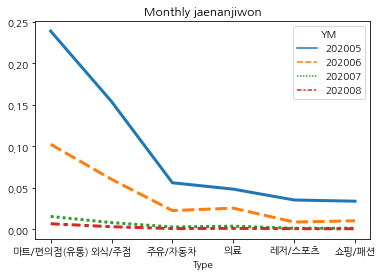

In [97]:
import seaborn as sns

jeju_cat['Type'].unique()
jaenan_month = jaenan_month.reindex(jaenan_rate.index)[0:7]
sns.lineplot(data = jaenan_month, palette = "tab10", linewidth = 3).set_title("Monthly jaenanjiwon")

In [93]:
jaenan_month

YM,202005,202006,202007,202008
Type,,,,
마트/편의점(유통),0.238847,0.102416,0.015450,0.006608
외식/주점,0.153928,0.060217,0.007986,0.003050
주유/자동차,0.056024,0.022528,0.002757,0.000839
의료,0.048340,0.025429,0.003679,0.001081
레저/스포츠,0.035283,0.008696,0.001173,0.000719
쇼핑/패션,0.033810,0.010178,0.001250,0.000571
생활/기타,0.027701,0.007951,0.001087,0.000538
카페/베이커리,0.023930,0.009658,0.001256,0.000523
교육/육아,0.015060,0.007183,0.000666,0.000163
